In [75]:
import numpy as np
import pandas as pd
import math

In [97]:
df = pd.read_csv('iris.csv')

In [98]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [99]:
df = df.drop('species', axis =1)

In [100]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [101]:
intial_cent = df.sample(n=3)

In [102]:
intial_cent

,sepal_length,sepal_width,petal_length,petal_width
117,7.7,3.8,6.7,2.2
106,4.9,2.5,4.5,1.7
8,4.4,2.9,1.4,0.2


In [103]:
def distance(p1, p2):
    return math.dist(p1, p2)

In [105]:
cluster1 = []
cluster2 = []
cluster3 = []
for i in range(len(df)):
    d1 = distance(df.values[i], intial_cent.values[0])
    d2 = distance(df.values[i], intial_cent.values[1])
    d3 = distance(df.values[i], intial_cent.values[2])
    minimum = min(d1, d2, d3)
    if minimum == d1:
        cluster1.append(df.values[i])
    elif minimum == d2:
        cluster2.append(df.values[i])
    else:
        cluster3.append(df.values[i])

In [121]:
new_cluster1 = cluster1
new_cluster2 = cluster2
new_cluster3 = cluster3
while True:
    intial_cent[:1] = np.mean(new_cluster1, axis = 0)
    intial_cent[1:2] = np.mean(new_cluster2, axis = 0)
    intial_cent[2:3] = np.mean(new_cluster3, axis = 0)
    c1 = []
    c2 = []
    c3 = []
    for i in range(len(df)):
        d1 = distance(df.values[i], intial_cent.values[0])
        d2 = distance(df.values[i], intial_cent.values[1])
        d3 = distance(df.values[i], intial_cent.values[2])
        minimum = min(d1, d2, d3)
        if minimum == d1:
            c1.append(df.values[i])
        elif minimum == d2:
            c2.append(df.values[i])
        else:
            c3.append(df.values[i])
    y = [np.array_equal(c1, new_cluster1), np.array_equal(c2, new_cluster2), np.array_equal(c3, new_cluster3)]
    print(y)
    if all(y):
        break
    else:
        new_cluster1 = c1
        new_cluster2 = c2
        new_cluster3 = c3

[False, False, True]
[False, False, True]
[False, False, True]
[True, True, True]


In [122]:
new_cluster1

[array([6.9, 3.1, 4.9, 1.5]),
 array([6.7, 3. , 5. , 1.7]),
 array([6.3, 3.3, 6. , 2.5]),
 array([7.1, 3. , 5.9, 2.1]),
 array([6.3, 2.9, 5.6, 1.8]),
 array([6.5, 3. , 5.8, 2.2]),
 array([7.6, 3. , 6.6, 2.1]),
 array([7.3, 2.9, 6.3, 1.8]),
 array([6.7, 2.5, 5.8, 1.8]),
 array([7.2, 3.6, 6.1, 2.5]),
 array([6.5, 3.2, 5.1, 2. ]),
 array([6.4, 2.7, 5.3, 1.9]),
 array([6.8, 3. , 5.5, 2.1]),
 array([6.4, 3.2, 5.3, 2.3]),
 array([6.5, 3. , 5.5, 1.8]),
 array([7.7, 3.8, 6.7, 2.2]),
 array([7.7, 2.6, 6.9, 2.3]),
 array([6.9, 3.2, 5.7, 2.3]),
 array([7.7, 2.8, 6.7, 2. ]),
 array([6.7, 3.3, 5.7, 2.1]),
 array([7.2, 3.2, 6. , 1.8]),
 array([6.4, 2.8, 5.6, 2.1]),
 array([7.2, 3. , 5.8, 1.6]),
 array([7.4, 2.8, 6.1, 1.9]),
 array([7.9, 3.8, 6.4, 2. ]),
 array([6.4, 2.8, 5.6, 2.2]),
 array([6.1, 2.6, 5.6, 1.4]),
 array([7.7, 3. , 6.1, 2.3]),
 array([6.3, 3.4, 5.6, 2.4]),
 array([6.4, 3.1, 5.5, 1.8]),
 array([6.9, 3.1, 5.4, 2.1]),
 array([6.7, 3.1, 5.6, 2.4]),
 array([6.9, 3.1, 5.1, 2.3]),
 array([6.

In [123]:
import matplotlib.pyplot as plt

In [131]:
intial_cent

,sepal_length,sepal_width,petal_length,petal_width
117,6.850000,3.073684,5.742105,2.071053
106,5.901613,2.748387,4.393548,1.433871
8,5.006000,3.418000,1.464000,0.244000


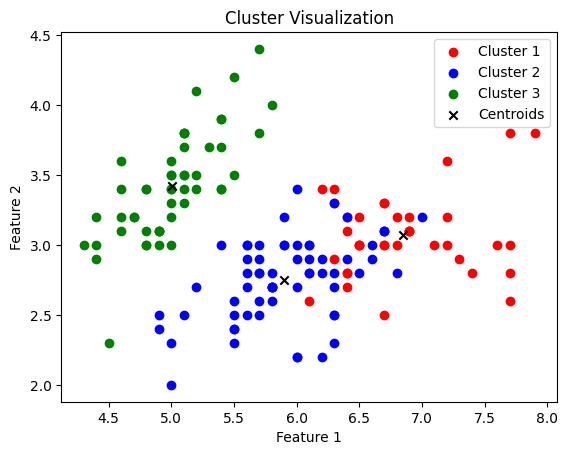

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the data is in a 2D space (you can modify it if your data has more dimensions)
# Scatter plot of the clusters
def plot_clusters(c1, c2, c3, centroids):
    # Convert lists to numpy arrays (if they are not already)
    c1 = np.array(c1)
    c2 = np.array(c2)
    c3 = np.array(c3)
    
    # Plot each cluster with a different color
    plt.scatter(c1[:, 0], c1[:, 1], c='red', label='Cluster 1')
    plt.scatter(c2[:, 0], c2[:, 1], c='blue', label='Cluster 2')
    plt.scatter(c3[:, 0], c3[:, 1], c='green', label='Cluster 3')

    # Plot the centroids (mean of each cluster)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', label='Centroids')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Cluster Visualization')
    plt.legend()
    plt.show()

# Plotting the clusters after convergence
# Assuming that final `new_cluster1`, `new_cluster2`, `new_cluster3` are your final clusters
# and `initial_cent` contains the final centroids

# Get centroids for plotting (mean of each cluster)
centroids = np.array([intial_cent.values[0], intial_cent.values[1], intial_cent.values[2]])

# Plot the clusters
plot_clusters(new_cluster1, new_cluster2, new_cluster3, centroids)


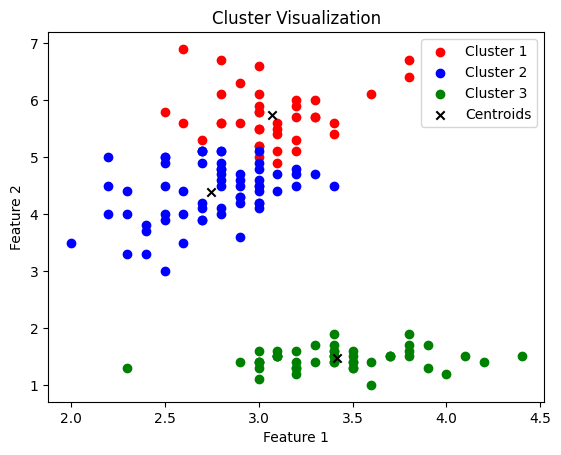

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the data is in a 2D space (you can modify it if your data has more dimensions)
# Scatter plot of the clusters
def plot_clusters(c1, c2, c3, centroids):
    # Convert lists to numpy arrays (if they are not already)
    c1 = np.array(c1)
    c2 = np.array(c2)
    c3 = np.array(c3)
    
    # Plot each cluster with a different color
    plt.scatter(c1[:, 1], c1[:, 2], c='red', label='Cluster 1')
    plt.scatter(c2[:, 1], c2[:, 2], c='blue', label='Cluster 2')
    plt.scatter(c3[:, 1], c3[:, 2], c='green', label='Cluster 3')

    # Plot the centroids (mean of each cluster)
    plt.scatter(centroids[:, 1], centroids[:, 2], c='black', marker='x', label='Centroids')

    plt.xlabel('Feature 2')
    plt.ylabel('Feature 3')
    plt.title('Cluster Visualization')
    plt.legend()
    plt.show()

# Plotting the clusters after convergence
# Assuming that final `new_cluster1`, `new_cluster2`, `new_cluster3` are your final clusters
# and `initial_cent` contains the final centroids

# Get centroids for plotting (mean of each cluster)
centroids = np.array([intial_cent.values[0], intial_cent.values[1], intial_cent.values[2]])

# Plot the clusters
plot_clusters(new_cluster1, new_cluster2, new_cluster3, centroids)


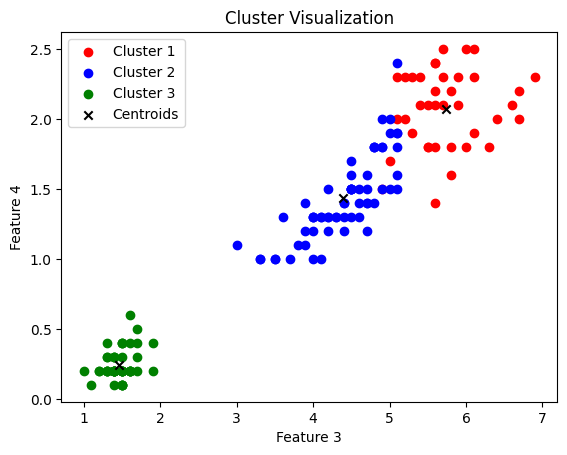

In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the data is in a 2D space (you can modify it if your data has more dimensions)
# Scatter plot of the clusters
def plot_clusters(c1, c2, c3, centroids):
    # Convert lists to numpy arrays (if they are not already)
    c1 = np.array(c1)
    c2 = np.array(c2)
    c3 = np.array(c3)
    
    # Plot each cluster with a different color
    plt.scatter(c1[:, 2], c1[:, 3], c='red', label='Cluster 1')
    plt.scatter(c2[:, 2], c2[:, 3], c='blue', label='Cluster 2')
    plt.scatter(c3[:, 2], c3[:, 3], c='green', label='Cluster 3')

    # Plot the centroids (mean of each cluster)
    plt.scatter(centroids[:, 2], centroids[:, 3], c='black', marker='x', label='Centroids')

    plt.xlabel('Feature 3')
    plt.ylabel('Feature 4')
    plt.title('Cluster Visualization')
    plt.legend()
    plt.show()

# Plotting the clusters after convergence
# Assuming that final `new_cluster1`, `new_cluster2`, `new_cluster3` are your final clusters
# and `initial_cent` contains the final centroids

# Get centroids for plotting (mean of each cluster)
centroids = np.array([intial_cent.values[0], intial_cent.values[1], intial_cent.values[2]])

# Plot the clusters
plot_clusters(new_cluster1, new_cluster2, new_cluster3, centroids)
